In [6]:
from sklearn.preprocessing import LabelEncoder
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs


sys.path.append(os.path.abspath('../src/modules'))
from utils import kmeans, elbow_method, PCA, plot_pca



path = os.path.abspath('../data/data.csv')

In [7]:
df = pd.read_csv(path, index_col=0)

In [8]:
features = df.drop(columns=['Unnamed: 32', 'diagnosis'])
labels = df['diagnosis']
features = features.values

dropping labels to implement unsupervised learning

### First experiment


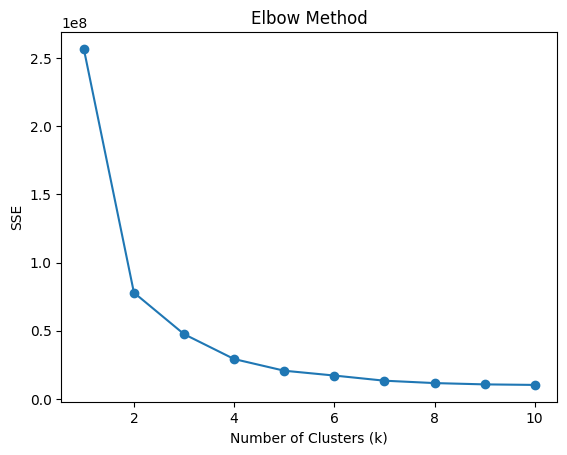

In [9]:
max_k = 10
sse_values = elbow_method(features, max_k=10)
plt.figure()
plt.plot(range(1, max_k+1), sse_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

best number of k clusters using elbow method is 4


The elbow method is applied to determine the optimal number of clusters k
Result: The plot shows a distinct elbow at =4
indicating that this is the optimal number of clusters for this dataset
k=balances the reduction in SSE and avoids overfitting.

In [10]:
# Create an instance of the kmeans class with desired clusters (k=4)
kmeans_model = kmeans(k=4, max_iter=100)

# Fit the model to the data
kmeans_model.fit(features)

# Calculate and display the SSE
sse = kmeans_model.calculate_sse(features)
print("Sum of Squared Errors (SSE):", sse)

Sum of Squared Errors (SSE): 29226541.651979793


K-means clustering is performed with k=4
Result: The SSE is printed This value represents the sum of squared distances between data points and their assigned cluster centroids
The SSE for k=4 serves as a baseline metric for clustering quality without dimensionality reduction

In [11]:
# Create an instance of the PCA class
pca_model = PCA(n_components=2)

pca_model.fit(features)
# Fit and transform the dataset
X_reduced = pca_model.transform(features)

# Access the principal components
print("Principal Components:\n", pca_model.components)

# Display the reduced dataset
print("Reduced Dataset (First 5 Points):\n", X_reduced[:5])

Principal Components:
 [[ 5.08623202e-03 -9.28705650e-03]
 [ 2.19657026e-03  2.88160658e-03]
 [ 3.50763298e-02 -6.27480827e-02]
 [ 5.16826469e-01 -8.51823720e-01]
 [ 4.23694535e-06  1.48194356e-05]
 [ 4.05260047e-05  2.68862249e-06]
 [ 8.19399539e-05 -7.51419574e-05]
 [ 4.77807775e-05 -4.63501038e-05]
 [ 7.07804332e-06  2.52430431e-05]
 [-2.62155251e-06  1.61197148e-05]
 [ 3.13742507e-04  5.38692831e-05]
 [-6.50984008e-05 -3.48370414e-04]
 [ 2.23634150e-03 -8.19640791e-04]
 [ 5.57271669e-02 -7.51112451e-03]
 [-8.05646029e-07 -1.49438131e-06]
 [ 5.51918197e-06 -1.27357957e-05]
 [ 8.87094462e-06 -2.86921009e-05]
 [ 3.27915009e-06 -9.36007477e-06]
 [-1.24101836e-06 -1.22647432e-05]
 [-8.54530832e-08 -2.89683790e-07]
 [ 7.15473257e-03  5.68673345e-04]
 [ 3.06736622e-03  1.32152605e-02]
 [ 4.94576447e-02  1.85961117e-04]
 [ 8.52063392e-01  5.19742358e-01]
 [ 6.42005481e-06  7.68565692e-05]
 [ 1.01275937e-04  2.56104144e-04]
 [ 1.68928625e-04  1.75471479e-04]
 [ 7.36658178e-05  3.05051743e-0

In [12]:
# Run K-means on the PCA-reduced dataset
kmeans_reduced = kmeans(k=4, max_iter=100)
kmeans_reduced.fit(X_reduced)

# Calculate SSE for the reduced data
sse_reduced = kmeans_reduced.calculate_sse(X_reduced)
print("SSE (Reduced Data):", sse_reduced)

SSE (Reduced Data): 28823916.135840204



Experiment with 2 prinipal components: 


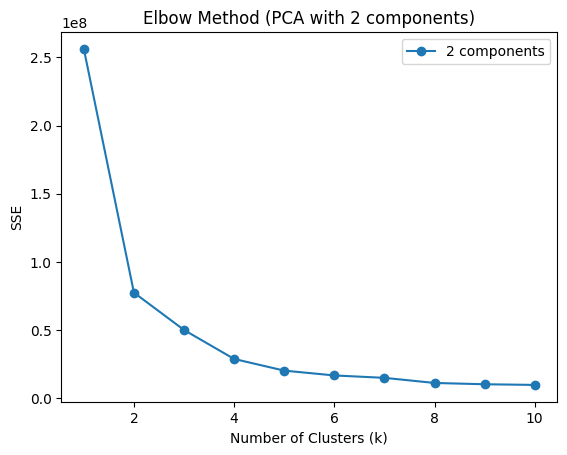


Experiment with 3 prinipal components: 


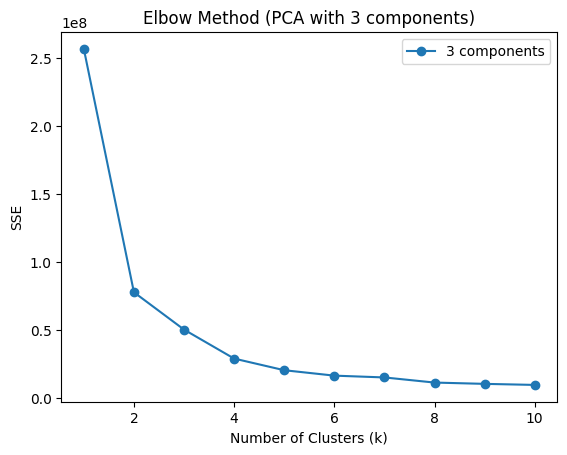


Experiment with 4 prinipal components: 


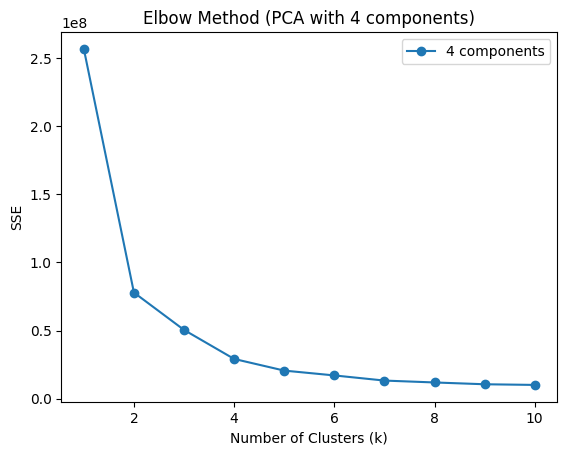


Experiment with 5 prinipal components: 


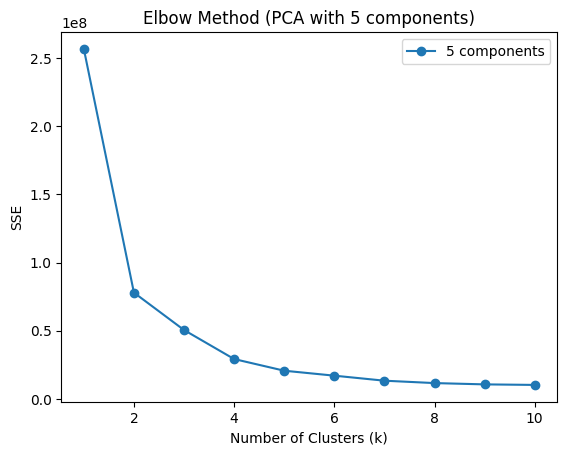


Experiment with 6 prinipal components: 


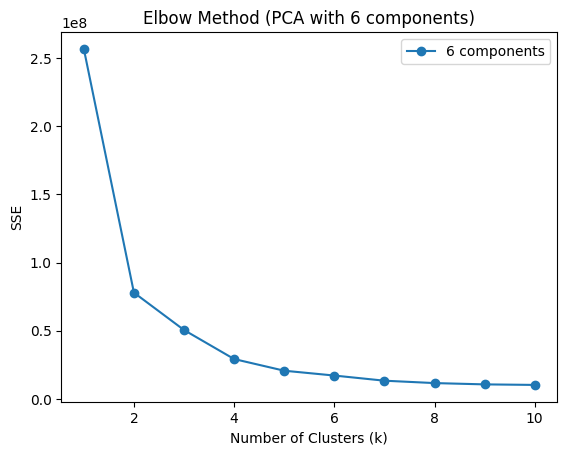


Experiment with 7 prinipal components: 


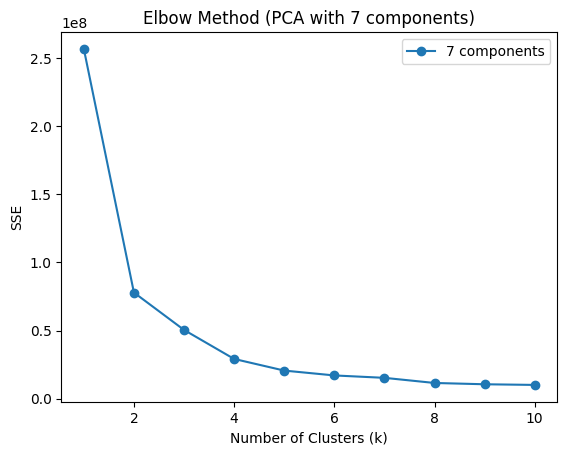


Experiment with 8 prinipal components: 


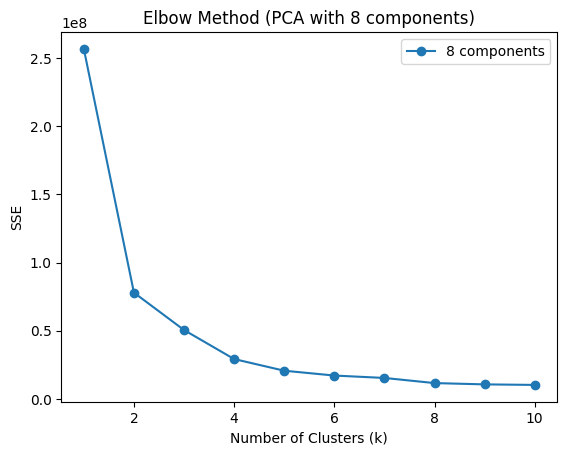


Experiment with 9 prinipal components: 


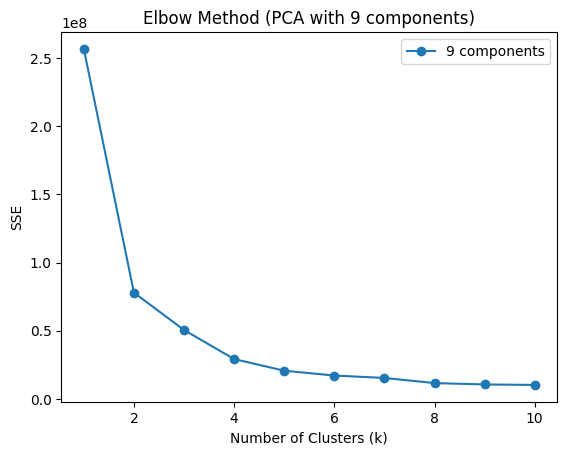


Experiment with 10 prinipal components: 


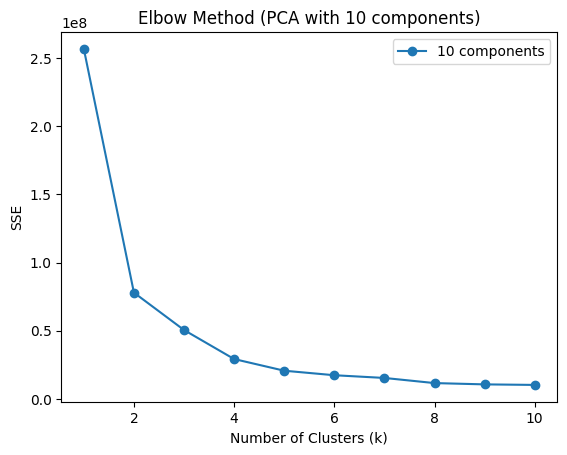

In [13]:
# different number of components in PCA
no_of_components = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for comp in no_of_components:
    print(f"\nExperiment with {comp} prinipal components: ")
    pca_model = PCA(n_components=comp)
    pca_model.fit(features)
    X_reduced = pca_model.transform(features)

    sse_values_reduced = elbow_method(X_reduced, max_k=10)
    plt.figure()
    plt.plot(range(1, 11), sse_values_reduced,
             marker='o', label=f"{comp} components")
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('SSE')
    plt.title(f'Elbow Method (PCA with {comp} components)')
    plt.legend()
    plt.show()

In [14]:
for comp in no_of_components:
    print(f"\nExperiment with {comp} prinipal components: ")
    pca_model = PCA(n_components=comp)
    pca_model.fit(features)
    X_reduced = pca_model.transform(features)

    kmeans_reduced = kmeans(k=4, max_iter=100)
    kmeans_reduced.fit(X_reduced)
    sse_reduced = kmeans_reduced.calculate_sse(X_reduced)
    print("SSE (Reduced Data):", sse_reduced)


Experiment with 2 prinipal components: 
SSE (Reduced Data): 28823916.135840204

Experiment with 3 prinipal components: 
SSE (Reduced Data): 29177304.58255875

Experiment with 4 prinipal components: 
SSE (Reduced Data): 29202814.515801087

Experiment with 5 prinipal components: 
SSE (Reduced Data): 29223543.677013926

Experiment with 6 prinipal components: 
SSE (Reduced Data): 29225169.48976285

Experiment with 7 prinipal components: 
SSE (Reduced Data): 29226188.23460943

Experiment with 8 prinipal components: 
SSE (Reduced Data): 29226386.637277186

Experiment with 9 prinipal components: 
SSE (Reduced Data): 29226467.423666887

Experiment with 10 prinipal components: 
SSE (Reduced Data): 29226515.12834315


Exploring Different PCA Components
Elbow Method with PCA Components

PCA is applied with varying numbers of components and the elbow method is repeated for each.
experiment with 2 principle components shows least SSE
a smaller SSE indicates that the clusters are more compact  which typically means better clustering performance
Also elbow plot shows that the optimal number of clusters is k=4

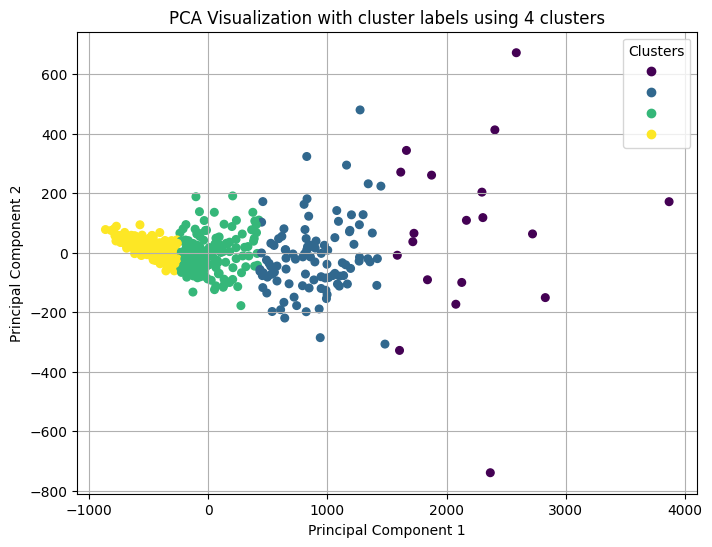

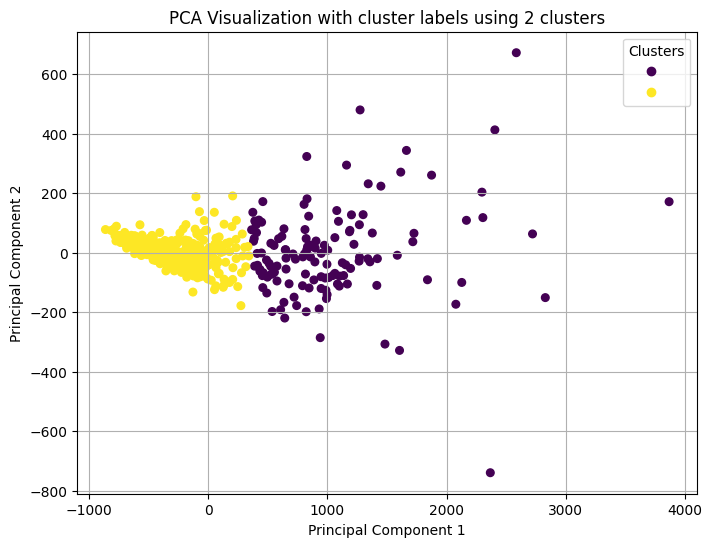

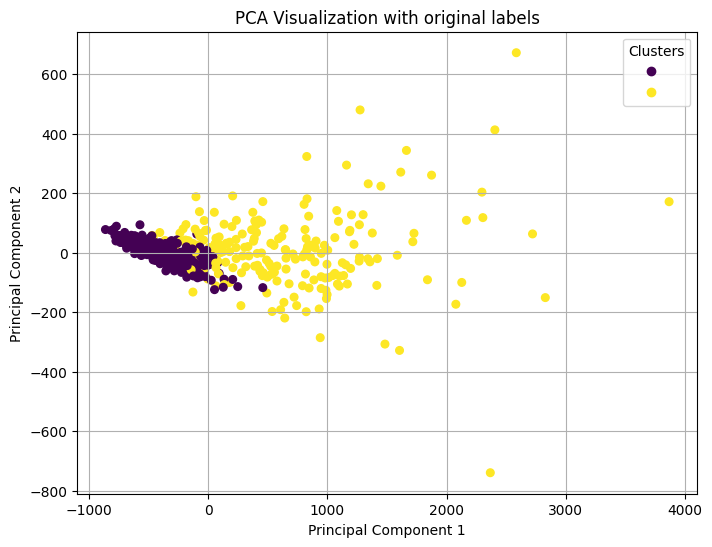

In [15]:
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

pca_model = PCA(n_components=2)
pca_model.fit(features)
X_reduced = pca_model.transform(features)
kmeans_4reduced = kmeans(k=4, max_iter=100)
kmeans_4reduced.fit(X_reduced)
kmeans_2reduced = kmeans(k=2, max_iter=100)
kmeans_2reduced.fit(X_reduced)
plot_pca(X_reduced, labels=kmeans_reduced.labels_,
         title="PCA Visualization with cluster labels using 4 clusters")
plot_pca(X_reduced, labels=kmeans_2reduced.labels_,
         title="PCA Visualization with cluster labels using 2 clusters")
plot_pca(X_reduced, labels=numeric_labels,
         title="PCA Visualization with original labels")

Even though k=4 is the optimal number of clusters we only need to cluster our data into 2 groups as we only have two classes 
and as we can see the cluster plot is very similar to the original labels plot